* ASIF KAMRAN
* 8789001269
* LinkedIn: linkedin.com/in/asif-kamran-bbb3761a4

# HR Analytics

# 1. Importing the required Python Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#importing Train and Test Dataset
data_train=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')

In [3]:
data_train.shape

(54808, 14)

In [4]:
data_test.shape

(23490, 13)

In [5]:
data_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
data_train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

# 2. Fill/Impute Missing Values

In [7]:
data_train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
data_test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

Text(0.5, 1.0, 'Fig 1: Missing Values in Train_Dataset')

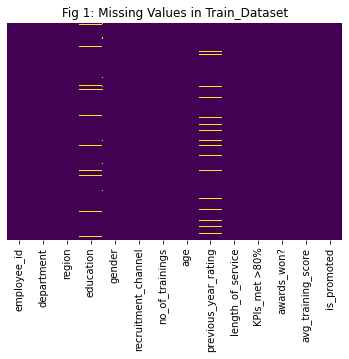

In [9]:
# to visualise missing data using heatmap
sns.heatmap(data_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Fig 1: Missing Values in Train_Dataset')

Text(0.5, 1.0, 'Fig 2: Missing Values in Test_Dataset')

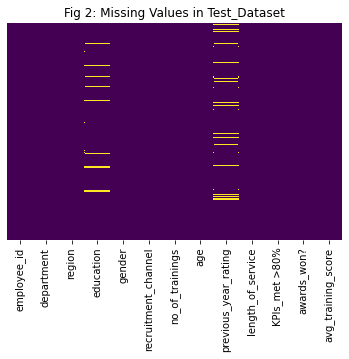

In [10]:
sns.heatmap(data_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Fig 2: Missing Values in Test_Dataset')

In [11]:
#filling missing value with 0
data_train['previous_year_rating'].fillna(0,inplace=True)
data_test['previous_year_rating'].fillna(0,inplace=True)

In [12]:
data_train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [13]:
#Filling missing value with Other's as it showed higher f1 score
data_train['education'].fillna("Other's" ,inplace=True)
data_test['education'].fillna("Other's", inplace=True)

In [14]:
data_train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Other's              2409
Below Secondary       805
Name: education, dtype: int64

In [15]:
data_train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [16]:
data_test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

# 3. Perform EDA

In [17]:
#Check for Imbalance of Target Column in Datasets
data_train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

Text(0.5, 1.0, 'Fig 3: is_promoted')

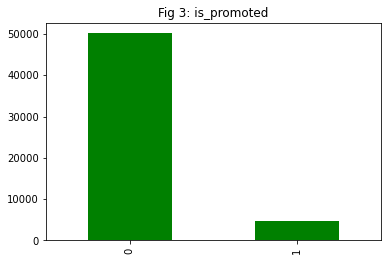

In [18]:
#is_promoted
data_train['is_promoted'].value_counts().plot.bar(color='g')
plt.title('Fig 3: is_promoted')

Text(0.5, 1.0, 'Fig 4: Different Departments')

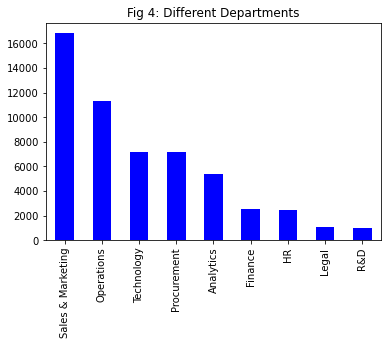

In [19]:
#Departments
data_train['department'].value_counts().plot.bar(color='b')
plt.title('Fig 4: Different Departments')

Text(0.5, 1.0, 'Fig 5: Different regions')

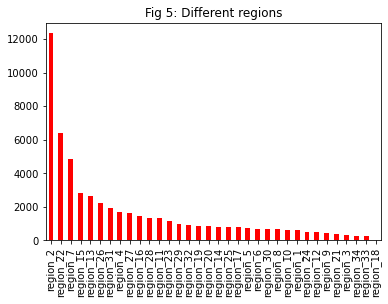

In [20]:
#region
data_train['region'].value_counts().plot.bar(color='r')
plt.title('Fig 5: Different regions')

Text(0.5, 1.0, 'Fig 6: Education')

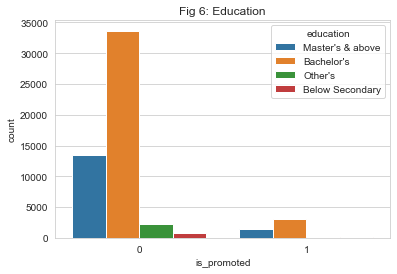

In [21]:
#Education
sns.set_style('whitegrid')
sns.countplot(x='is_promoted',hue='education',data=data_train)
plt.title('Fig 6: Education')

Text(0.5, 1.0, 'Fig 7: Gender')

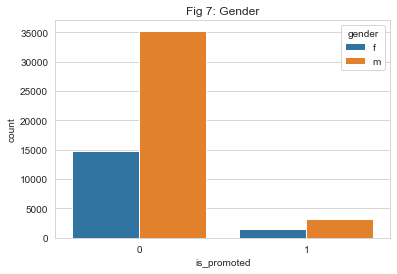

In [22]:
#Gender
sns.set_style('whitegrid')
sns.countplot(x='is_promoted',hue='gender',data=data_train)
plt.title('Fig 7: Gender')

Text(0.5, 1.0, 'Fig 8: Recruitment_channel')

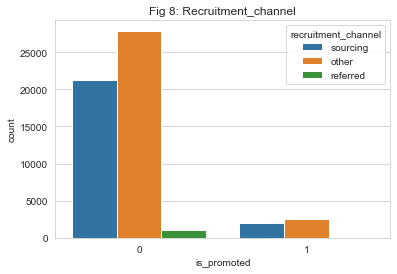

In [23]:
#Recruitment_channel
sns.set_style('whitegrid')
sns.countplot(x='is_promoted',hue='recruitment_channel',data=data_train)
plt.title('Fig 8: Recruitment_channel')

Text(0.5, 1.0, 'Fig 9: Ages')

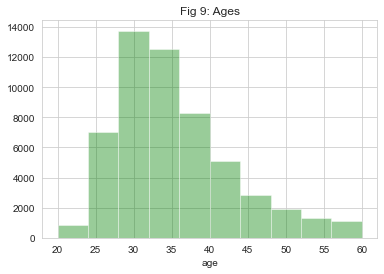

In [24]:
#Age
sns.distplot(data_train['age'],kde=False,bins=10,color='g')
plt.title('Fig 9: Ages')

Text(0.5, 1.0, 'Fig 10: Previous year rating')

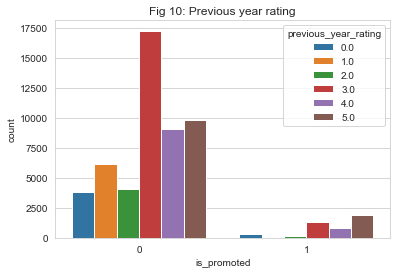

In [25]:
#Previous year rating
sns.set_style('whitegrid')
sns.countplot(x='is_promoted',hue='previous_year_rating',data=data_train)
plt.title('Fig 10: Previous year rating')

Text(0.5, 1.0, 'Fig 11: Length of service')

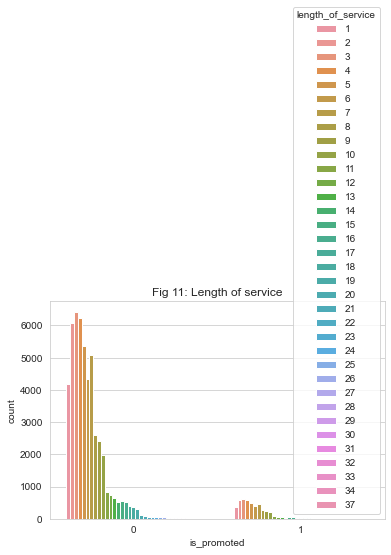

In [26]:
#Length of service
sns.set_style('whitegrid')
sns.countplot(x='is_promoted',hue='length_of_service',data=data_train)
plt.title('Fig 11: Length of service')

Text(0.5, 1.0, 'Fig 12: KPIs_met >80%')

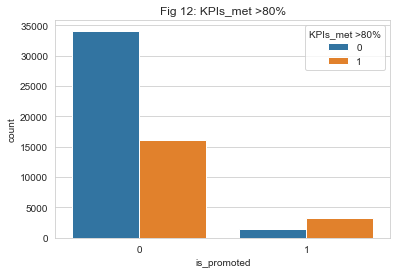

In [27]:
#KPI >80%
sns.set_style('whitegrid')
sns.countplot(x='is_promoted',hue='KPIs_met >80%',data=data_train)
plt.title('Fig 12: KPIs_met >80%')

Text(0.5, 1.0, 'Fig 13: Awards won')

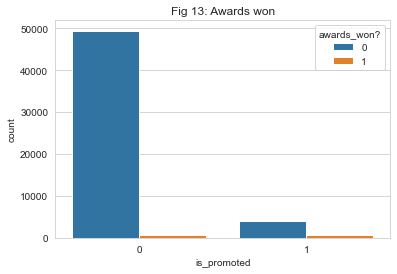

In [28]:
# Awards won
sns.set_style('whitegrid')
sns.countplot(x='is_promoted',hue='awards_won?',data=data_train)
plt.title('Fig 13: Awards won')

Text(0.5, 1.0, 'Fig 14: Correlation')

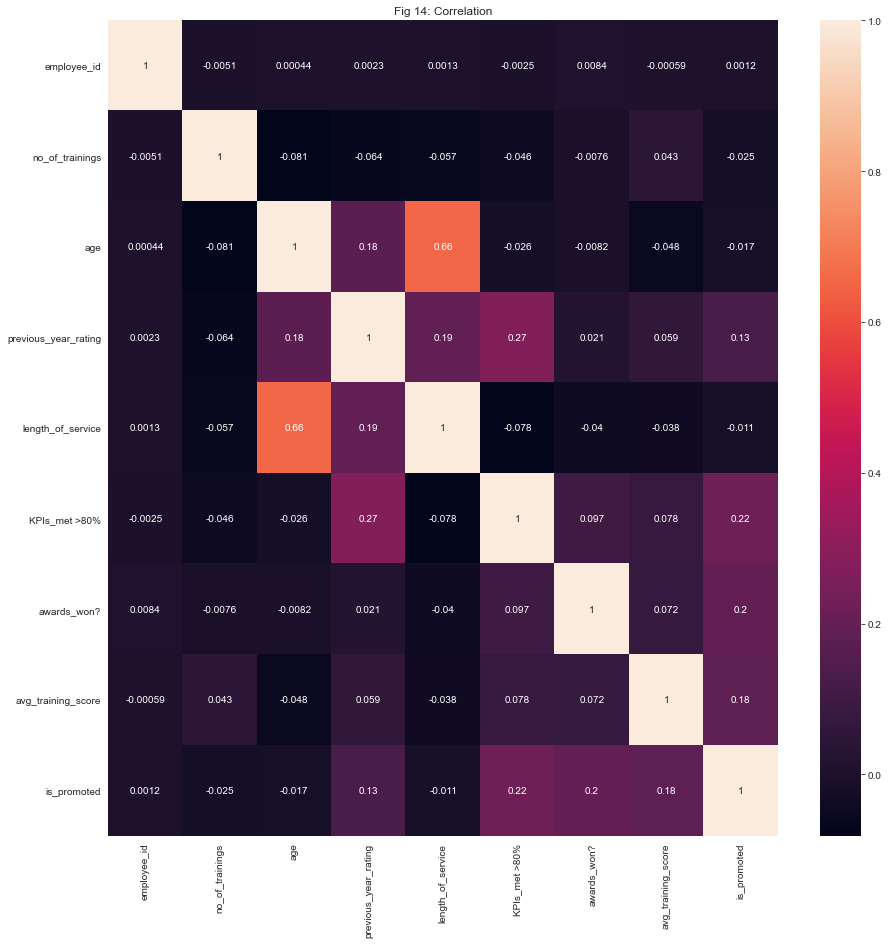

In [29]:
#correlation
corr=data_train.corr()
top_features=corr.index
plt.figure(figsize=(15,15))
sns.heatmap(data_train[top_features].corr(),annot=True)
plt.title('Fig 14: Correlation')

* length_of_service and age are correlated but not highly correlated

# 4. Data Encoding : OneHot Encoding

In [30]:
#check unique values
data_train['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [31]:
data_train['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [32]:
data_train['education'].unique()

array(["Master's & above", "Bachelor's", "Other's", 'Below Secondary'],
      dtype=object)

In [33]:
data_train['gender'].unique()

array(['f', 'm'], dtype=object)

In [34]:
data_train['recruitment_channel'].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [35]:
# One Hot Encoding
df_train =pd.get_dummies(data_train,columns=['gender','region','education','department','recruitment_channel'],drop_first=True)
df_test=pd.get_dummies(data_test,columns=['gender','region','education','department','recruitment_channel'],drop_first=True)

In [36]:
df_train.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,gender_m,...,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,35,5.0,8,1,0,49,0,0,...,0,0,0,0,0,0,1,0,0,1
1,65141,1,30,5.0,4,0,0,60,0,1,...,0,0,0,1,0,0,0,0,0,0
2,7513,1,34,3.0,7,0,0,50,0,1,...,0,0,0,0,0,0,1,0,0,1
3,2542,2,39,1.0,10,0,0,50,0,1,...,0,0,0,0,0,0,1,0,0,0
4,48945,1,45,3.0,2,0,0,73,0,1,...,0,0,0,0,0,0,0,1,0,0


In [37]:
df_train.shape

(54808, 56)

In [38]:
df_test.shape

(23490, 55)

# 5. Feature Selection:

In [39]:
#variance Threshold
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(df_train)

VarianceThreshold(threshold=0)

In [40]:
sum(var_thres.get_support())

56

# 6. Split Train Data into Features(Independent) & Target(Dependent)

In [41]:
X_train = df_train.drop(['is_promoted','employee_id'],axis=1)
y_train = df_train['is_promoted']
X_test =df_test.drop(['employee_id'],axis=1)

# 7. Train_Test Split

In [42]:
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.2,random_state=22)

# 8. Feature Scaling

In [43]:
#RobustScaler which uses the median and the interquartile range often gives better results as it gave for this dataset.
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
scaler.fit(X_train)
X_train=pd.DataFrame(scaler.transform(X_train))
X_valid=pd.DataFrame(scaler.fit_transform(X_valid))
X_test=pd.DataFrame(scaler.fit_transform(X_test))

In [44]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0.0,0.1,1.0,-0.25,1.0,0.0,0.68,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.1,1.0,-0.50,1.0,0.0,-0.04,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.3,1.0,1.25,1.0,0.0,0.40,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,-0.6,0.0,-0.75,1.0,0.0,0.88,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,-0.4,0.0,-0.50,1.0,0.0,-0.28,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# 9. Model Building

## i. LogisticRegression

In [45]:

from sklearn.linear_model import LogisticRegression
model_1=LogisticRegression()
model_1.fit(X_train, y_train)
pred_1= model_1.predict(X_valid)
from sklearn.metrics import classification_report
print(classification_report(y_valid,pred_1))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96      9995
           1       0.85      0.25      0.38       967

    accuracy                           0.93     10962
   macro avg       0.89      0.62      0.67     10962
weighted avg       0.92      0.93      0.91     10962



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## ii. CatBoostClassifier

In [46]:
from catboost import CatBoostClassifier
model_2=CatBoostClassifier(iterations=40)
model_2.fit(X_train, y_train)
pred_2= model_2.predict(X_valid)
from sklearn.metrics import classification_report
print(classification_report(y_valid,pred_2))


Learning rate set to 0.5
0:	learn: 0.3403151	total: 212ms	remaining: 8.28s
1:	learn: 0.2213720	total: 243ms	remaining: 4.62s
2:	learn: 0.2057315	total: 263ms	remaining: 3.24s
3:	learn: 0.1807754	total: 277ms	remaining: 2.49s
4:	learn: 0.1789613	total: 290ms	remaining: 2.03s
5:	learn: 0.1772604	total: 303ms	remaining: 1.72s
6:	learn: 0.1733565	total: 316ms	remaining: 1.49s
7:	learn: 0.1700162	total: 329ms	remaining: 1.31s
8:	learn: 0.1688273	total: 375ms	remaining: 1.29s
9:	learn: 0.1681974	total: 390ms	remaining: 1.17s
10:	learn: 0.1667352	total: 404ms	remaining: 1.07s
11:	learn: 0.1639510	total: 420ms	remaining: 979ms
12:	learn: 0.1634177	total: 437ms	remaining: 909ms
13:	learn: 0.1628249	total: 452ms	remaining: 839ms
14:	learn: 0.1623062	total: 468ms	remaining: 780ms
15:	learn: 0.1618407	total: 483ms	remaining: 725ms
16:	learn: 0.1612895	total: 497ms	remaining: 672ms
17:	learn: 0.1607447	total: 512ms	remaining: 626ms
18:	learn: 0.1600038	total: 526ms	remaining: 581ms
19:	learn: 0.159

# 10. Model Evalute:

## F1 Score = 2*(precision * recall) / (precision+recall)

In [47]:
from sklearn.metrics import f1_score

In [48]:
print(f1_score(y_valid,pred_1)) #Logistic

0.38202247191011235


In [49]:
print(f1_score(y_valid,pred_2)) #Catboost

0.5150602409638555


# 11. Submission

submission = pd.read_csv('sample_submission_M0L0uXE.csv')
final_predictions = model_2.predict(X_test)
submission['is_promoted'] = final_predictions
#only positive predictions for the target variable
submission['is_promoted'] = submission['is_promoted'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('sub_rf2.csv', index=False)